In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv('D:\DATA SCIENCE\DATA SETS\Walmart_Store_sales.csv')
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [6]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
# pip install datetime

                                              0.0/52.2 kB ? eta -:--:--
     ---------------------------------------  51.2/52.2 kB ? eta -:--:--
     -------------------------------------- 52.2/52.2 kB 666.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date']);

In [12]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [18]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# 1. Which store has maximum sales?

In [20]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [21]:
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


In [22]:
pd.DataFrame(total_sales).tail(1)

,Weekly_Sales
Store,
33,37160222.0


# 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [23]:
df_std = df.groupby('Store')['Weekly_Sales'].std().round(3).sort_values(ascending=False)

In [24]:
pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996


In [25]:
store14  = df[df.Store == 14].Weekly_Sales

In [26]:
mean_to_stddev = store14.std()/store14.mean()*100

mean_to_stddev.round(2)

15.71

In [27]:
q2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store') ['Weekly_Sales'].sum().round()
q3_sales = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [28]:
pd.DataFrame({'Q2 Sales' :q2_sales,
              'Q3 Sales' :q3_sales,
            'Difference' :(q3_sales-q2_sales),
            'Growth Rate' :(q3_sales-q2_sales)/q3_sales*100}).sort_values(by=['Growth Rate'], ascending=False).head()

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163
26,13218290.0,12417575.0,-800715.0,-6.448240
39,20191586.0,18899955.0,-1291631.0,-6.834043


# 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [29]:
Super_Bowl =  ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-09-2010', '09-09-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [30]:
Super_Bowl_sales = df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales = df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales = df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [31]:
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [32]:
non_holiday_sales = df[(df['Holiday_Flag'] == 0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [33]:
result = pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
                       'Labour Day Sales':Labour_Day_sales,
                       'Thanksgiving Sales':Thanksgiving_sales,
                       'Christmas Sales':Christmas_sales,
                       'Non Holiday Sales':non_holiday_sales}]).T
                    
result

,0
Super Bowl Sales,1079127.99
Labour Day Sales,1042427.29
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
Non Holiday Sales,1041256.38


# 5. Provide a monthly and semester view of sales in units and give insights

In [34]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [35]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


# Monthly/ Monthwise Sales

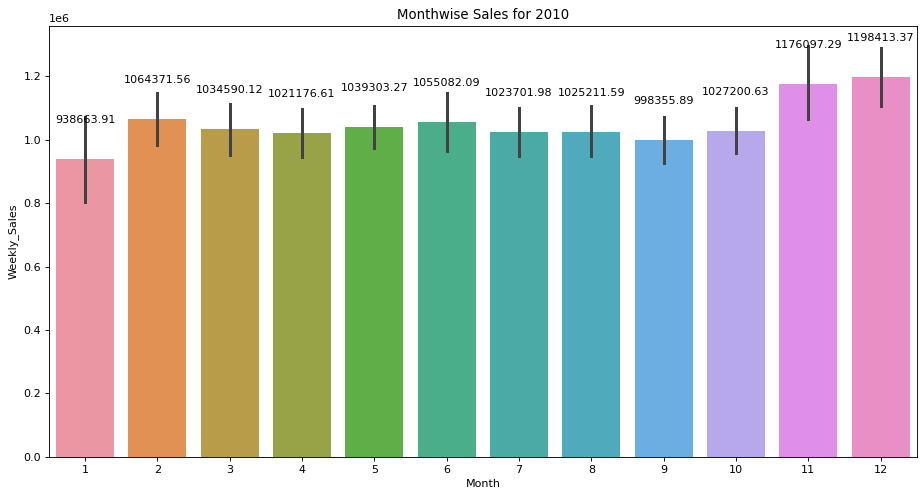

In [36]:
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2010]['Month'], y=df[df.Year==2010]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2010')


for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    
               ha = 'center', va = 'center',  xytext = (0, 35), textcoords =  'offset points')


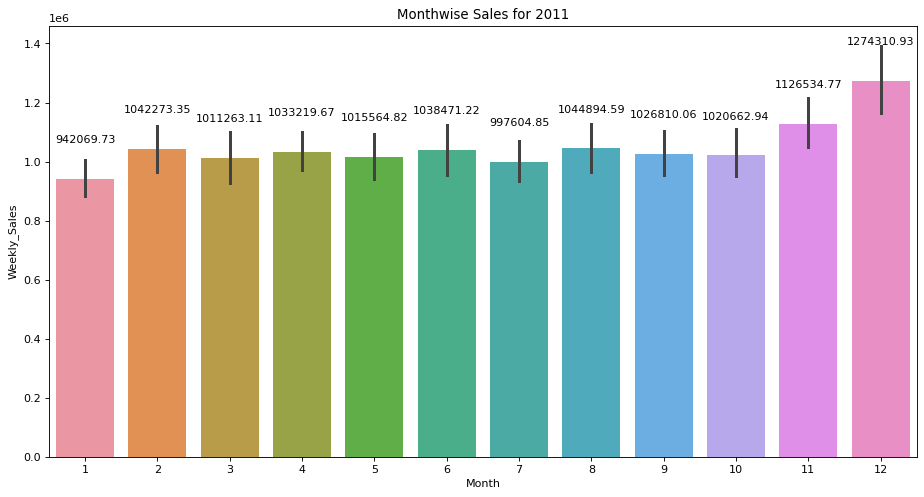

In [39]:
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2011]['Month'], y=df[df.Year==2011]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2011')


for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    
               ha = 'center', va = 'center',  xytext = (0, 35), textcoords =  'offset points')

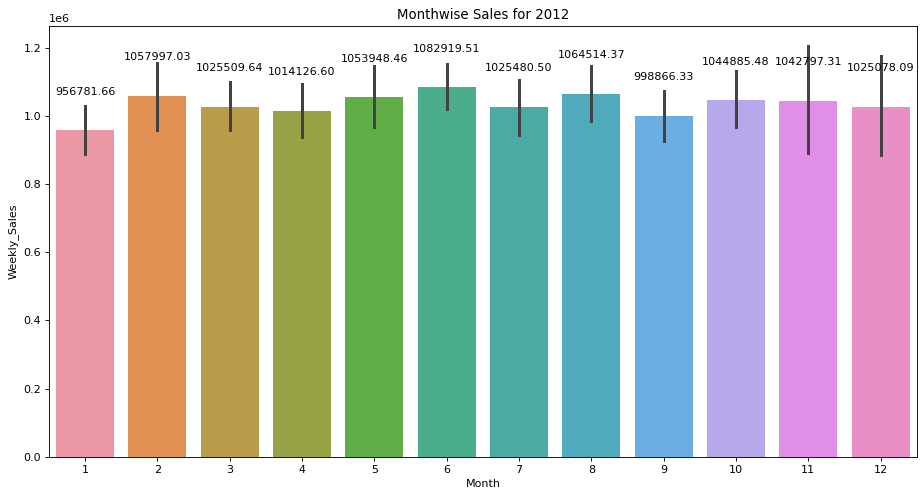

In [38]:
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2012]['Month'], y=df[df.Year==2012]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2012')


for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    
               ha = 'center', va = 'center',  xytext = (0, 35), textcoords =  'offset points')

# Monthly Sales

Text(0.5, 1.0, 'Monthwise Sales')

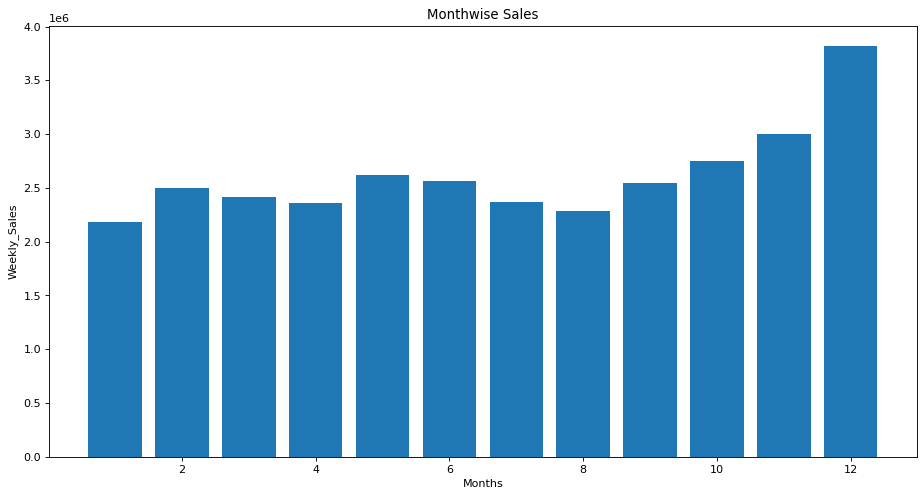

In [40]:
plt.figure(figsize=(14,7), dpi=80)
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

# Yearly Sales

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

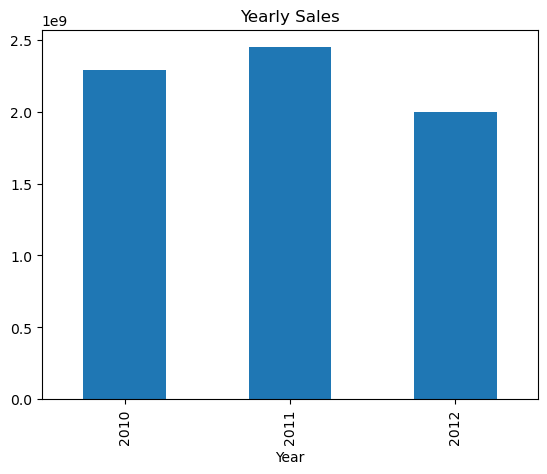

In [41]:
plt.figure(figsize=(10,7), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

In [42]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [49]:
df = pd.read_csv('D:\DATA SCIENCE\DATA SETS\Walmart_Store_sales.csv')
print(df['Weekly_Sales'].sum())

6737218987.11


In [50]:
df.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [51]:
df = pd.read_csv('D:\DATA SCIENCE\DATA SETS\Walmart_Store_sales.csv')
print(len(df.index))

6435


# Statistical Model

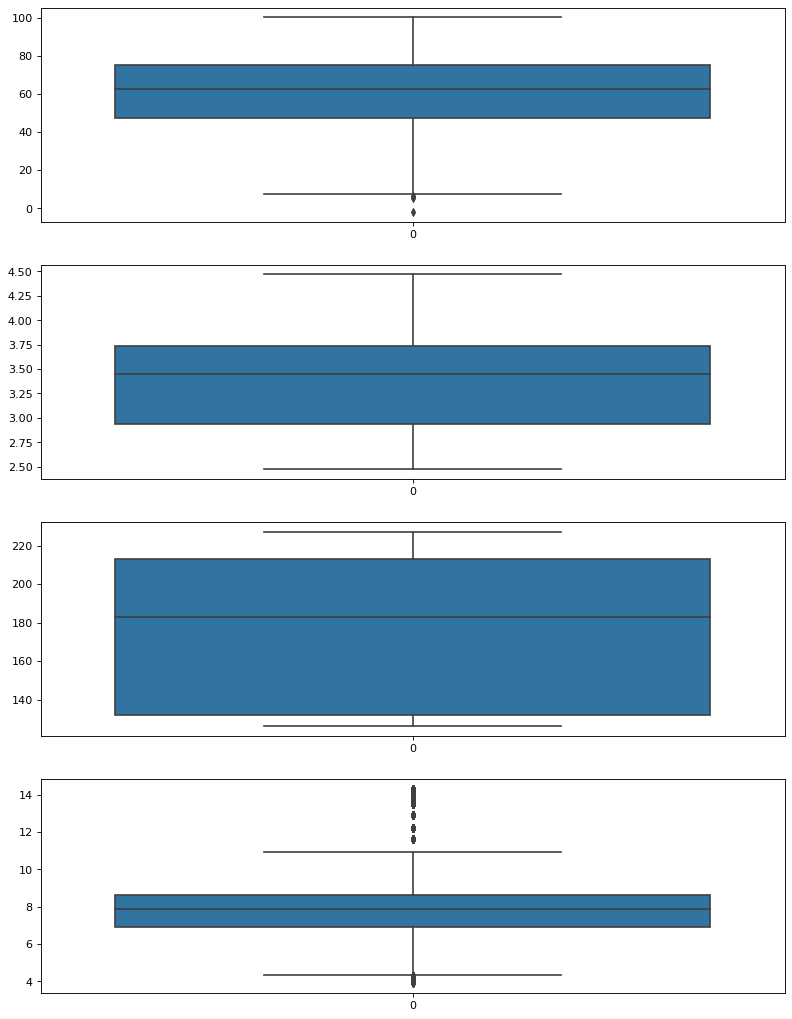

In [73]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]
          
for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [74]:
df = df[df['Unemployment'] <= 10.5]
df = df[df['Unemployment'] >= 4.7]
df = df[df['Temperature'] >= 8]

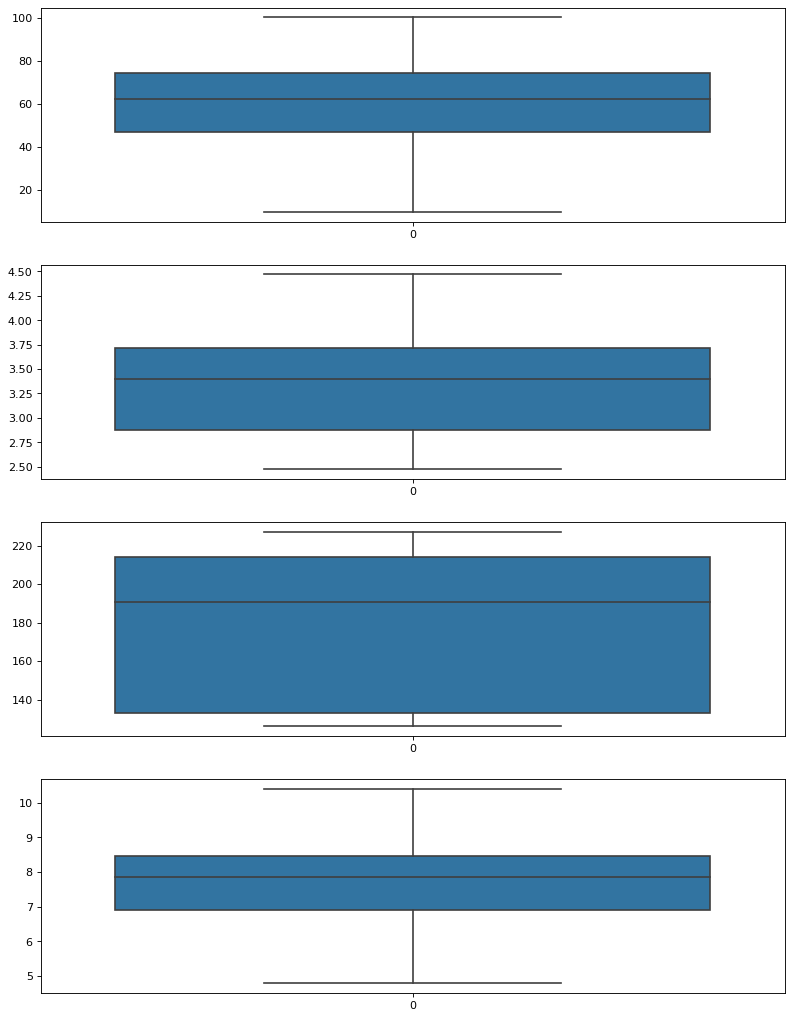

In [75]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5763 non-null   int64  
 1   Date          5763 non-null   object 
 2   Weekly_Sales  5763 non-null   float64
 3   Holiday_Flag  5763 non-null   int64  
 4   Temperature   5763 non-null   float64
 5   Fuel_Price    5763 non-null   float64
 6   CPI           5763 non-null   float64
 7   Unemployment  5763 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 534.2+ KB


# Model Building

In [85]:
x = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 1. Linear Regression

* Linear Regression *

Train Accuracy Score: 11.853 %
Test Accuracy Score: 13.001999999999999 %
Mean Absolute Error: 441442.34
Mean Squared Error: 286556820373.642
Root Mean Squared Error: 535310.023


NameError: name 'y_pred' is not defined

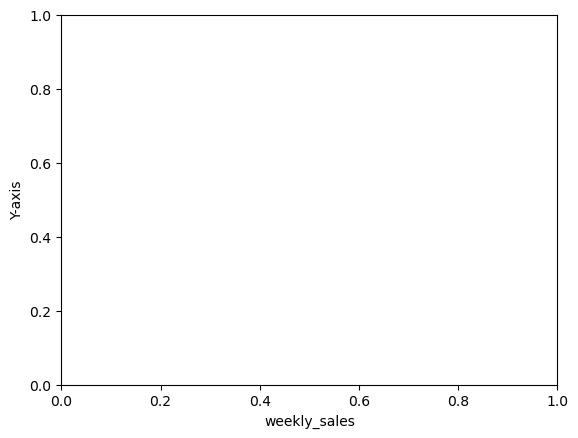

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print('* Linear Regression *\n')

print('Train Accuracy Score:', lr.score(x_train, y_train).round(5)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(3))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(3))

plt.xlabel("weekly_sales")
plt.ylabel("Y-axis")
plt.scatter(y_test,y_pred)
plt.show()

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

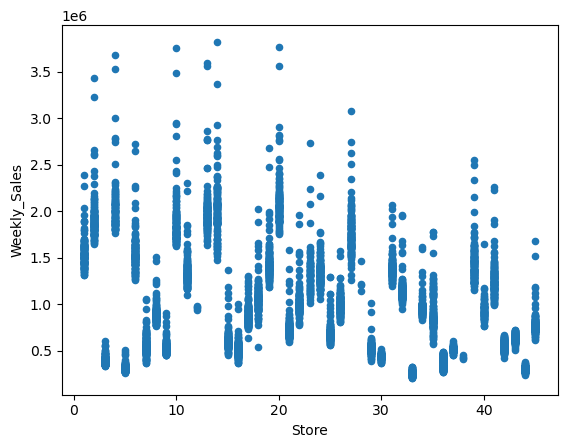

In [99]:
df.plot(x='Store',y='Weekly_Sales',kind='scatter')

<Axes: >

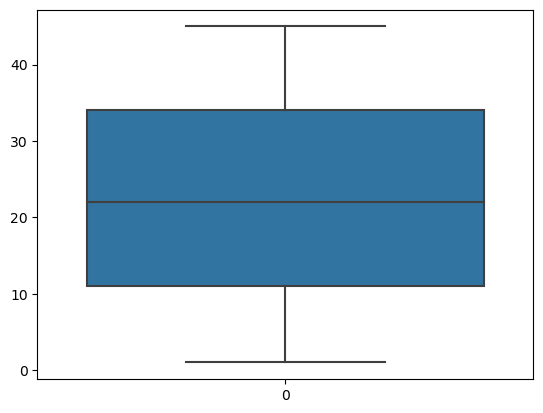

In [87]:
sns.boxplot(df['Store'])

<Axes: >

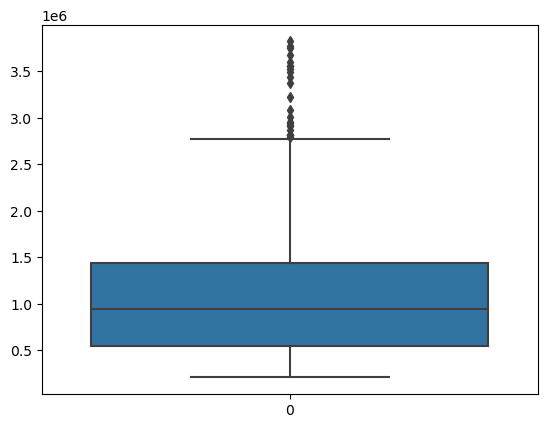

In [88]:
sns.boxplot(df['Weekly_Sales'])

<Axes: >

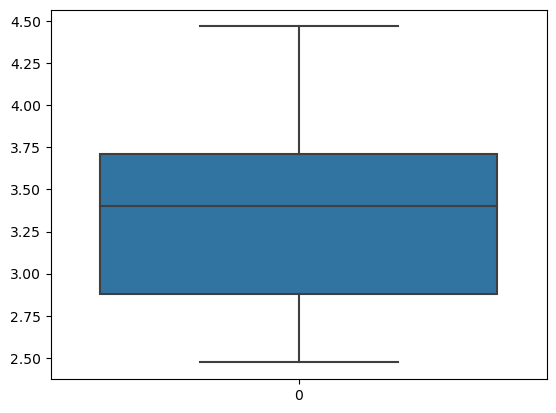

In [101]:
sns.boxplot(df['Fuel_Price'])

<Axes: >

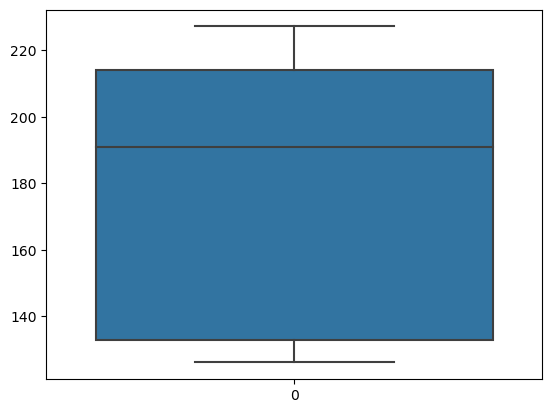

In [102]:
sns.boxplot(df['CPI'])

<Axes: >

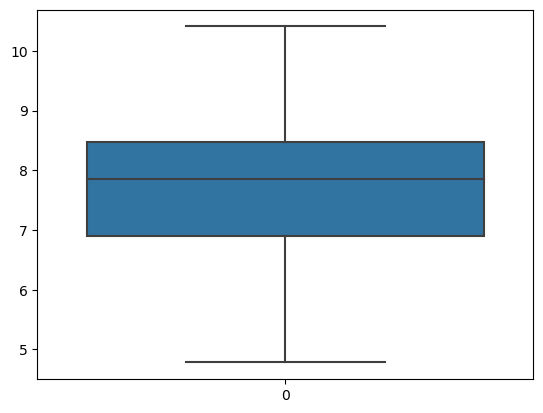

In [103]:
sns.boxplot(df['Unemployment'])

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Holiday_Flag'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >, <Axes: >]],
      dtype=object)

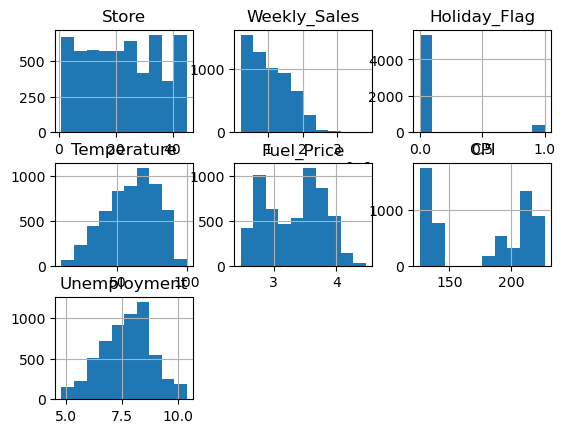

In [104]:
df.hist()

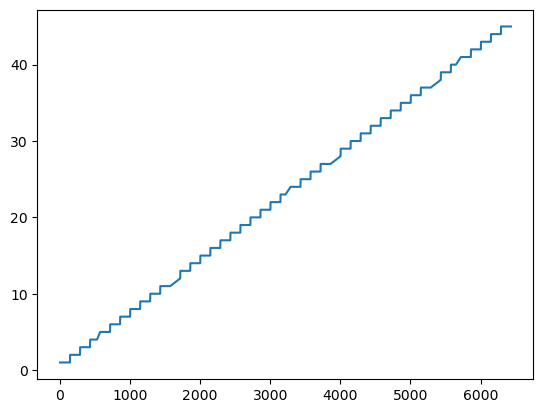

In [105]:
plt.plot(df['Store'])

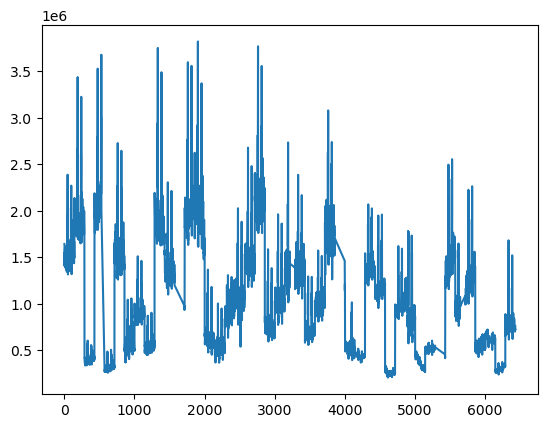

In [106]:
plt.plot(df['Weekly_Sales'])

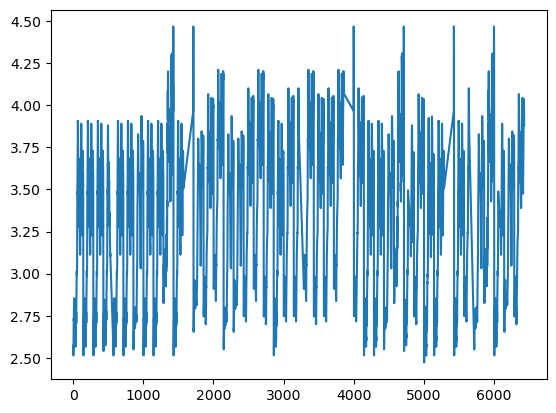

In [107]:
plt.plot(df['Fuel_Price'])

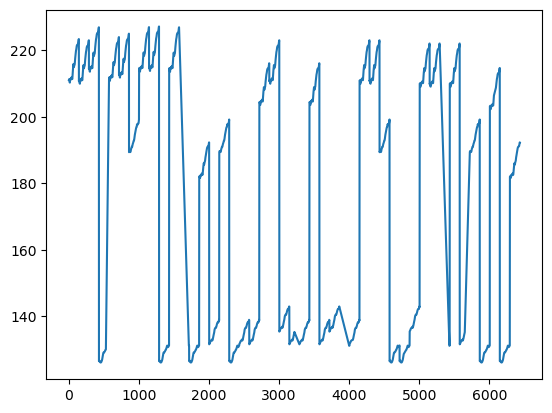

In [108]:
plt.plot(df['CPI'])

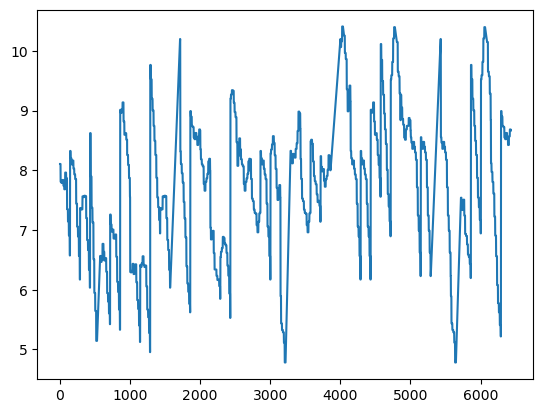

In [110]:
plt.plot(df['Unemployment'])

# LinearRegression

In [124]:
from sklearn.tree import DecisionTreeRegressor
dtr = LinearRegression()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.scatter(y_test,y_pred)
plt.xlabel("weekly_sales")
plt.ylabel("Y-axis")
plt.show()

* Decision Tree Regressor *

Accuracy                 = 13.001999999999999 %
Mean Absolute Error      = 441442.34043
Mean Squared Error       = 286556820373.6416
Root Mean Squared Error  = 535310.02267


NameError: name 'y_pred' is not defined

# KNeighborsRegressor

* KNearest Neighbors *

Accuracy                 = 84.08200000000001 %
Mean Absolute Error      = 132163.42725
Mean Squared Error       = 52431644482.6618
Root Mean Squared Error  = 228979.5722


NameError: name 'y_pred' is not defined

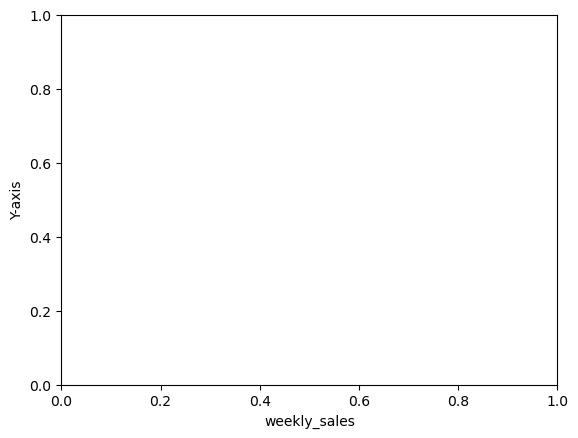

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_y_pred = knn.predict(x_test)

R2_knn = r2_score(y_test, knn_y_pred)
mae = metrics.mean_absolute_error(y_test, knn_y_pred)
mse = metrics.mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

print('* KNearest Neighbors *\n')

print('Accuracy                 =', R2_knn.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.xlabel("weekly_sales")
plt.ylabel("Y-axis")
plt.scatter(y_test,y_pred)
plt.show()

# RandomForestRegressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.scatter(y_test,y_pred)
plt.xlabel("weekly_sales")
plt.ylabel("Y-axis")
plt.show()

* Random Forest Regressor *

Accuracy                 = 51.726000000000006 %
Mean Absolute Error      = 202456.81159
Mean Squared Error       = 159007317652.3263
Root Mean Squared Error  = 398757.21643


NameError: name 'y_pred' is not defined

# DecisionTreeRegressor

In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.scatter(y_test,y_pred)
plt.xlabel("weekly_sales")
plt.ylabel("Y-axis")
plt.show()

* Decision Tree Regressor *

Accuracy                 = 4.568 %
Mean Absolute Error      = 297462.85578
Mean Squared Error       = 314338005652.44696
Root Mean Squared Error  = 560658.5464


NameError: name 'y_pred' is not defined

# Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.11905191 0.14008776 0.13453912 0.11234261 0.10376063 0.12488145
 0.07894749 0.11997159 0.12717744 0.09190394]
Mean Score: 11.526639471754736 %


In [121]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr_scores = cross_val_score(rfr, x_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.92898069 0.90771916 0.94397654 0.95480828 0.9213161  0.93156456
 0.92650385 0.92872927 0.93405616 0.9457565 ]
Mean Score: 93.23411093573174 %


In [122]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr_scores = cross_val_score(dtr, x_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.9060931  0.83826383 0.91751555 0.92905848 0.83257271 0.86775063
 0.85342333 0.91785577 0.91709168 0.91584819]
Mean Score: 88.95473276499807 %


In [123]:
#KNearest Neighbor

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn_scores = cross_val_score(knn, x_train,y_train, cv=10, scoring='r2')
print(knn_scores)
print("Mean Score:", knn_scores.mean()*100,'%')

[0.82506326 0.76226513 0.85187505 0.81564147 0.84197284 0.82081465
 0.82303142 0.81683913 0.80805323 0.83486124]
Mean Score: 82.00417416793815 %


In [125]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.311041,-0.000211,-0.033542,0.040528,-0.211542,0.314464
Weekly_Sales,-0.311041,1.000000,0.037179,-0.056042,0.009231,-0.079200,-0.027519
Holiday_Flag,-0.000211,0.037179,1.000000,-0.157305,-0.079074,-0.001817,0.014623
Temperature,-0.033542,-0.056042,-0.157305,1.000000,0.132108,0.232576,-0.024109
Fuel_Price,0.040528,0.009231,-0.079074,0.132108,1.000000,-0.128903,-0.127781
CPI,-0.211542,-0.079200,-0.001817,0.232576,-0.128903,1.000000,-0.254445
Unemployment,0.314464,-0.027519,0.014623,-0.024109,-0.127781,-0.254445,1.000000


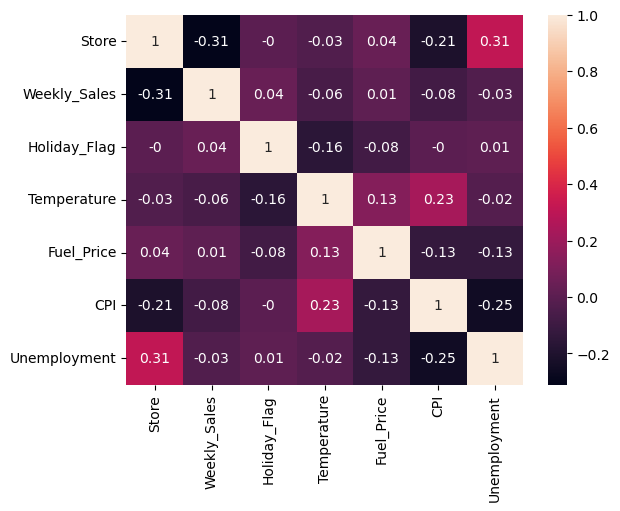

In [126]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [128]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
print(lr.intercept_)
print(lr.coef_)

1046551.1854880695
[-202100.51751526    7507.88156225  -79662.58526573   30027.77610014]


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=0000)

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(4610, 4)
(4034,)
(1153, 4)
(4610, 4)


In [139]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [140]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4610, 1, 1, 4)
(4034,)
(1153, 1, 1, 4)
(1729,)


<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

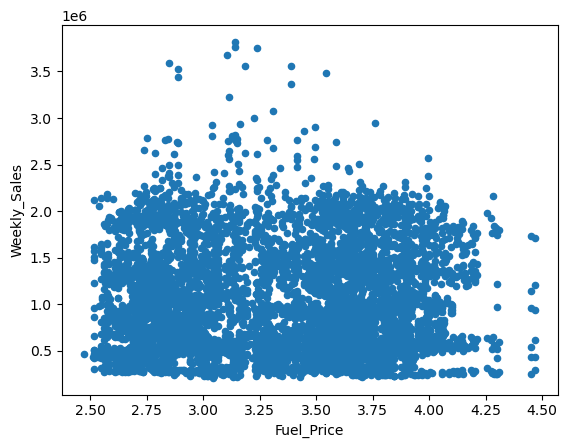

In [143]:
df.plot(x='Fuel_Price', y='Weekly_Sales',kind='scatter')

In [144]:
x = df['Fuel_Price']
x.head()

0    2.572
1    2.548
2    2.514
3    2.561
4    2.625
Name: Fuel_Price, dtype: float64

In [146]:
y = df['Weekly_Sales']
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=0000)

In [152]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4610, 1, 1, 1, 4)
(4034,)
(1153, 1, 1, 1, 4)
(1729,)


In [149]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [150]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4610, 1, 1, 1, 4)
(4034,)
(1153, 1, 1, 1, 4)
(1729,)


In [153]:
print(lr.intercept_)
print(lr.coef_)

1046551.1854880695
[-202100.51751526    7507.88156225  -79662.58526573   30027.77610014]


ValueError: x and y must have same first dimension, but have shapes (60,) and (1729,)

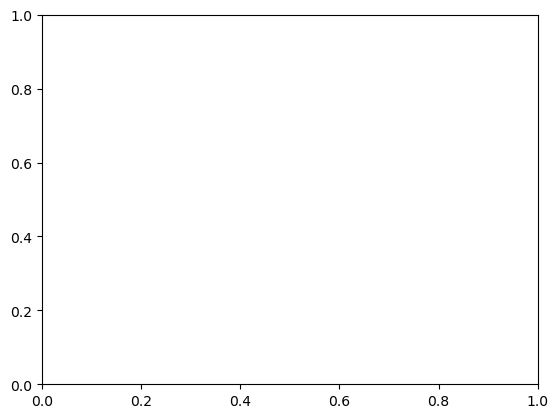

In [154]:
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]          
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Sales', fontsize=16)  